In [28]:

import xarray as xr
import pandas as pd
import numpy as np


ds_sat = xr.open_dataset('LGMR_data/ds_sat_flipped.nc')

df_pre = pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\pre.csv")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


   LibSize       X:Y       Y:X
0     10.0  0.749629  0.468065
1     20.0  0.816442  0.781017
2     30.0  0.866314  0.819761
3     40.0  0.868182  0.872478
4     50.0  0.882712  0.875378
5     60.0  0.881501  0.877404
6     70.0  0.888669  0.898828
Columns: Index(['LibSize', 'X:Y', 'Y:X'], dtype='object')


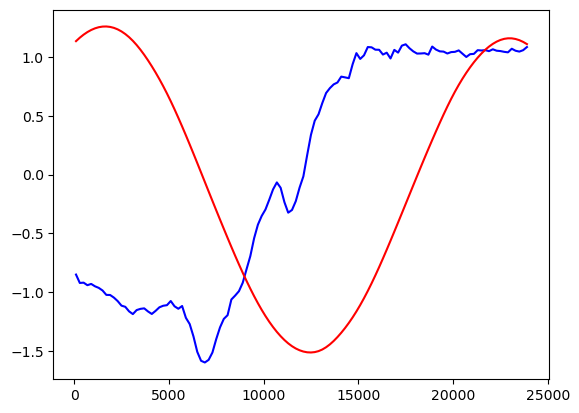

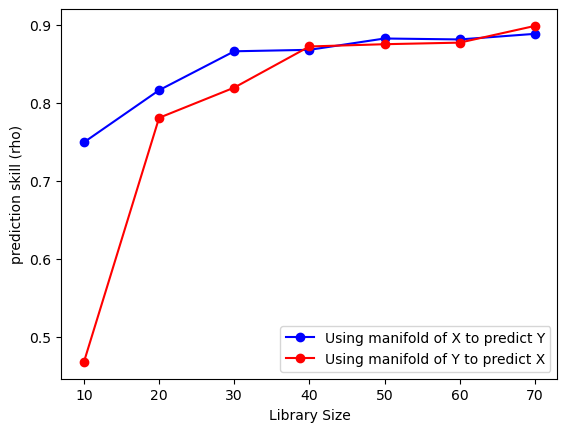

In [6]:

import pandas as pd
import numpy as np
from pyEDM import CCM
import matplotlib.pyplot as plt
from scipy.stats import zscore


# Prepare DataFrame
df = pd.DataFrame({
    'Time': ds_sat['age'].values,
    'X': ds_sat['sat'].isel(lat=80).isel(lon=0).values,
    'Y': df_pre['pre'].values
    
})




# plot df
fig, ax = plt.subplots()
plt.plot(df['Time'], zscore(df['X']), 'b-')
plt.plot(df['Time'], zscore(df['Y']), 'r-')



# CCM call
ccm_out = CCM(
    dataFrame   = df,
    E           = 4,
    tau         = 3,
    columns     = "X",   # predictor
    target      = "Y",   # target
    libSizes    = "10 20 30 40 50 60 70",
    sample      = 10,
    random      = True,
    replacement = False,
    Tp          = 0
)

print(ccm_out)
print("Columns:", ccm_out.columns)

fig, ax = plt.subplots()
# plot the results
plt.plot(ccm_out['LibSize'], ccm_out['X:Y'], 'bo-', label='Using manifold of X to predict Y')
plt.plot(ccm_out['LibSize'], ccm_out['Y:X'], 'ro-', label='Using manifold of Y to predict X')
plt.xlabel("Library Size")
plt.ylabel('prediction skill (rho)')
plt.legend()
plt.show()

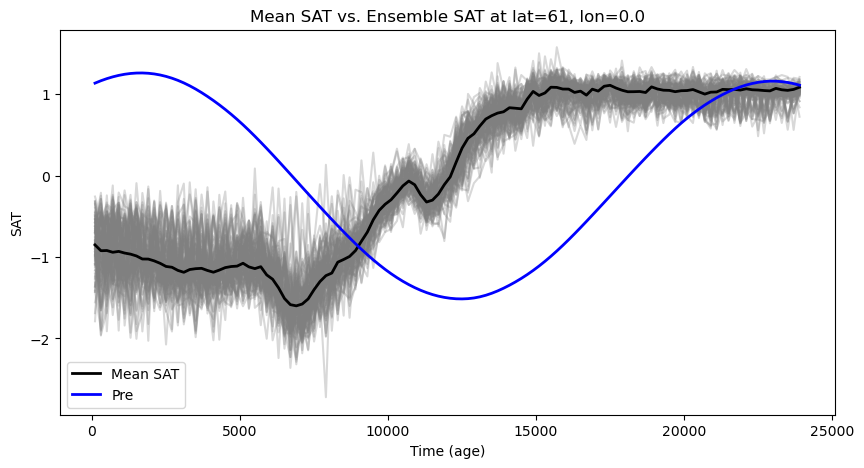

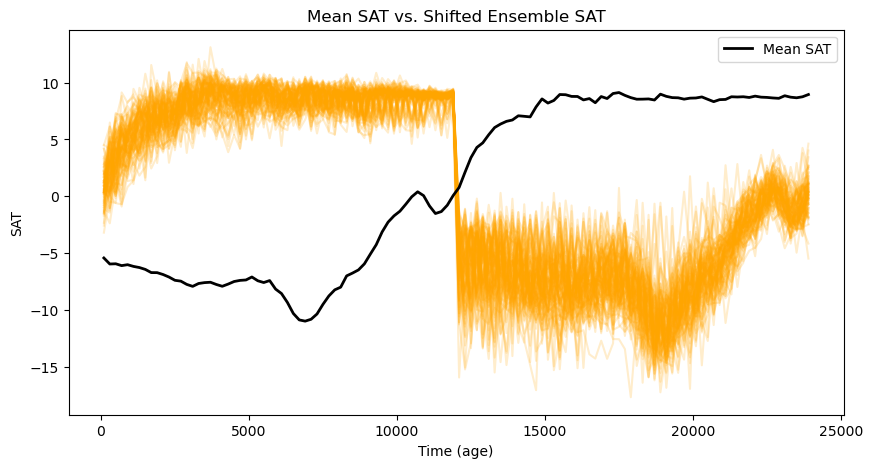

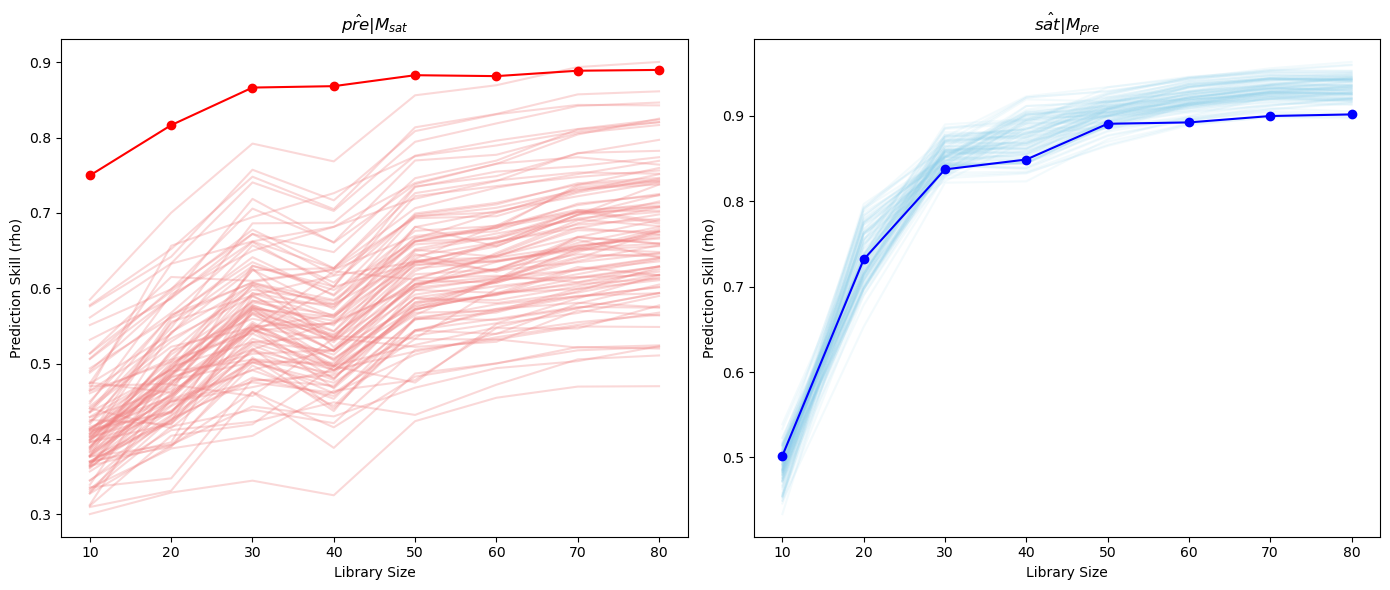

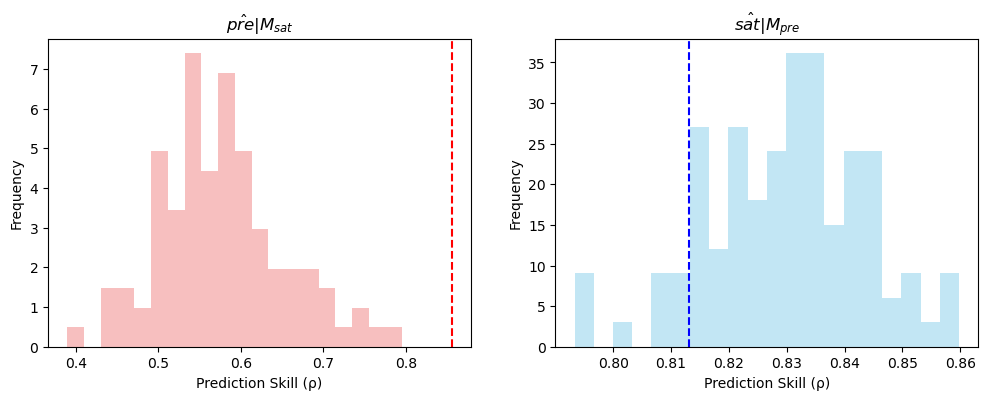

True


In [36]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)

results = st.ccm_significance_statistic(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= xr.open_dataset('LGMR_data/ds_sat_ens_flipped.nc'),
    lat_idx=80,
    lon_idx=0,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=0,
    libSizes="10 20 30 40 50 60 70 80",
    sample=10,
    show_figures=True
)

ccm_out = results["ccm_mean"]
ensemble_ccm = results["ensemble_ccm"]

test_result = st.ccm_significance_test(ccm_out, ensemble_ccm, if_plot=True)
print(test_result)


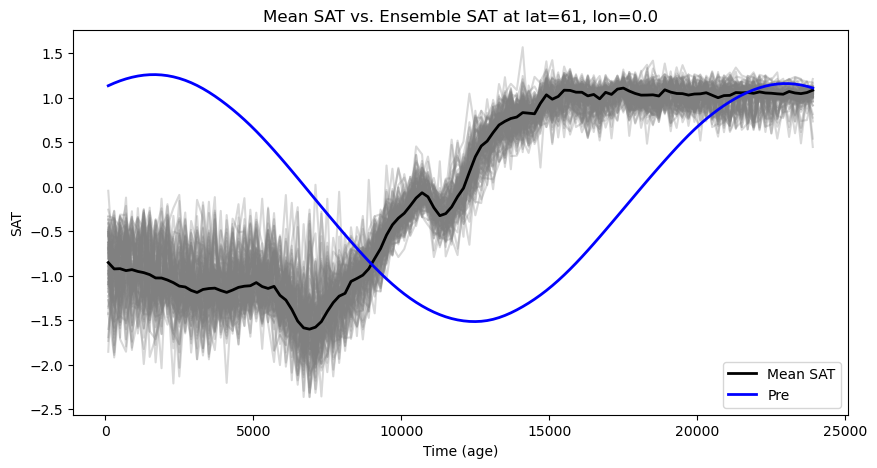

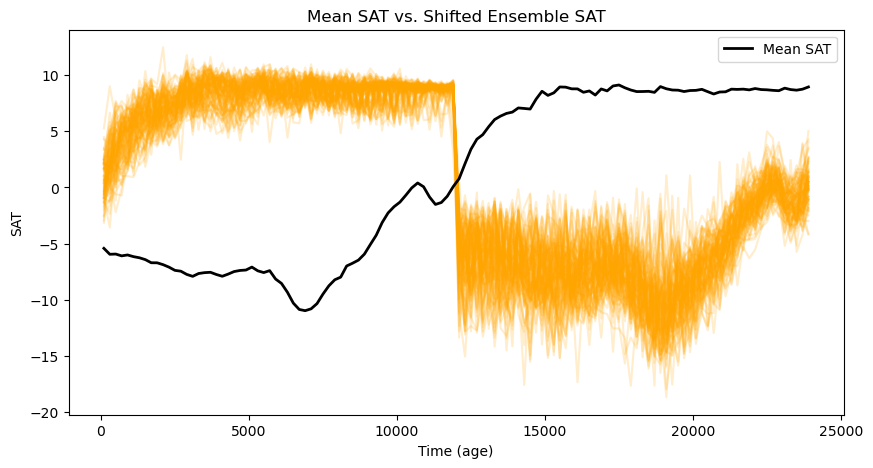

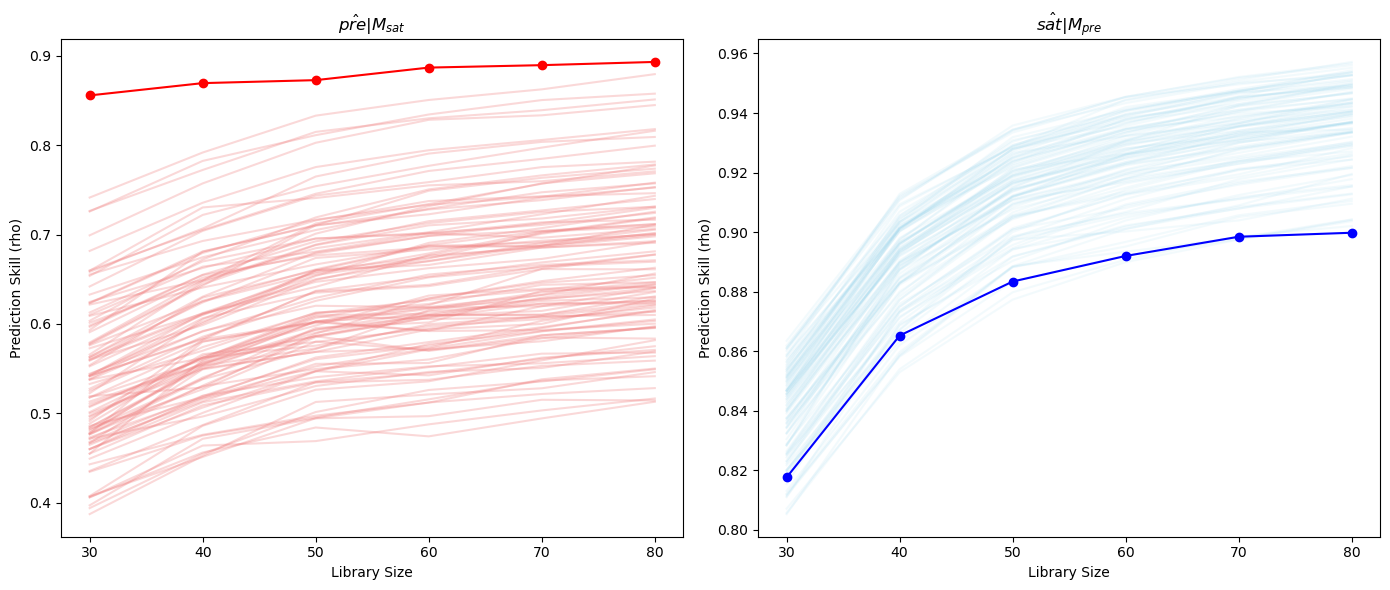

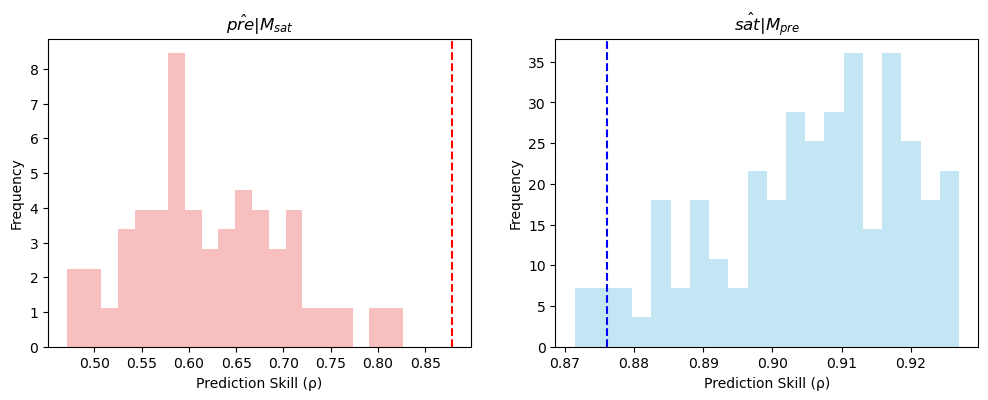

True


In [34]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)

results = st.ccm_significance_statistic(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= xr.open_dataset('LGMR_data/ds_sat_ens_flipped.nc'),
    lat_idx=80,
    lon_idx=0,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=0,
    libSizes="30 40 50 60 70 80",
    sample=30,
    show_figures=True
)

ccm_out = results["ccm_mean"]
ensemble_ccm = results["ensemble_ccm"]

test_result = st.ccm_significance_test(ccm_out, ensemble_ccm, if_plot=True)
print(test_result)


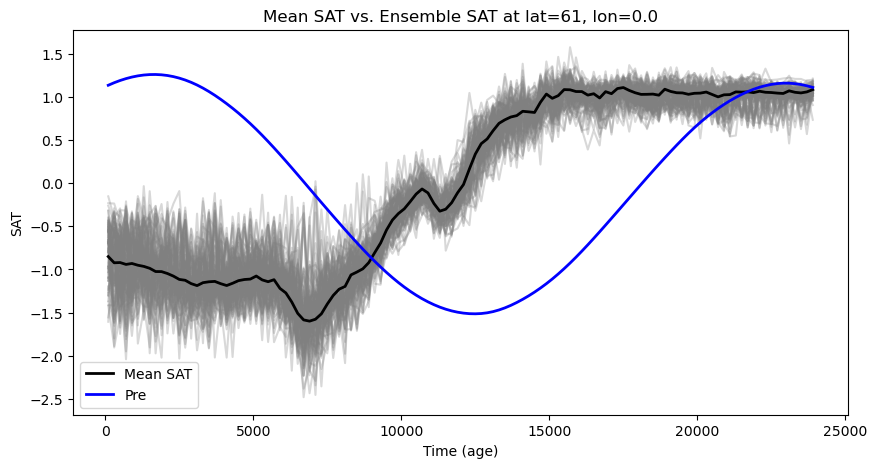

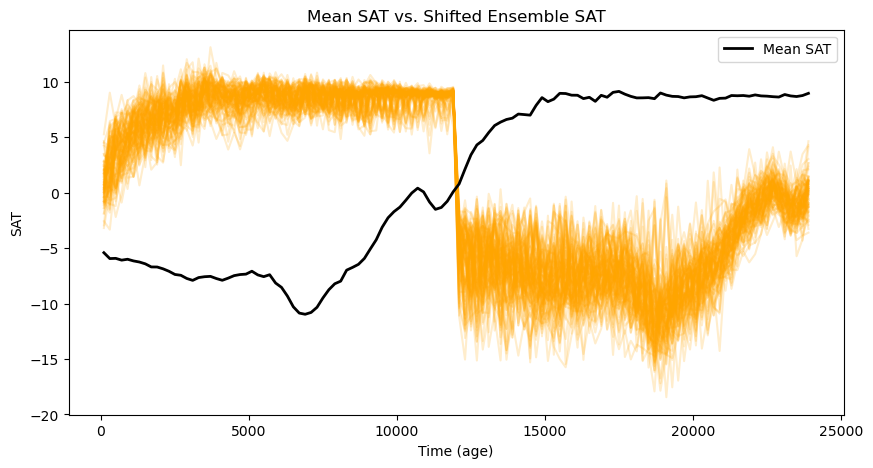

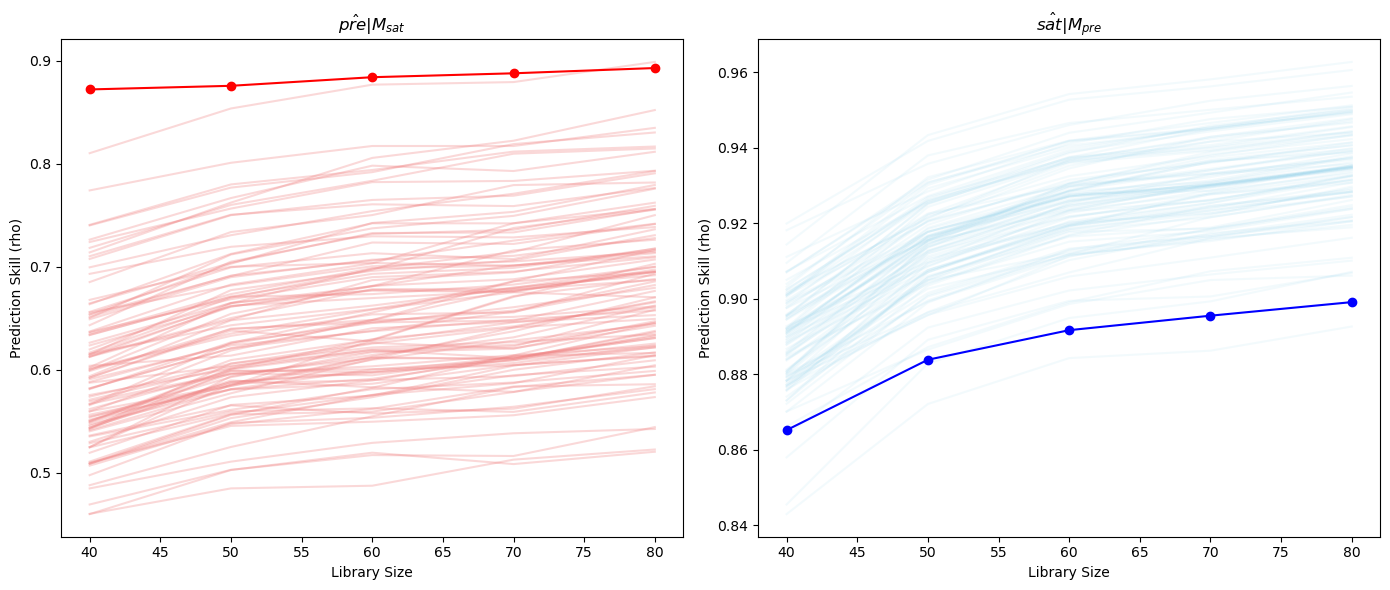

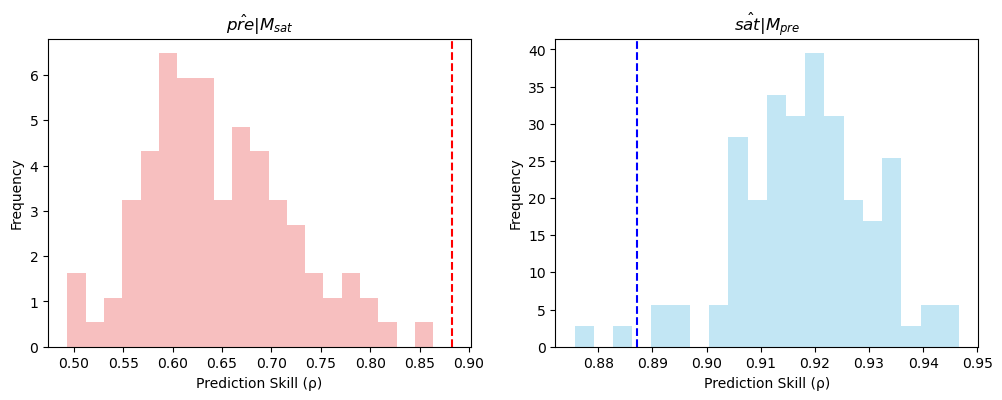

True


In [35]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)

results = st.ccm_significance_statistic(
    ds_sat= ds_sat,
    df_pre= df_pre,
    ds_sat_ens= xr.open_dataset('LGMR_data/ds_sat_ens_flipped.nc'),
    lat_idx=80,
    lon_idx=0,
    ens_sample=100,
    E_val=4,
    tau_val=3,
    Tp_val=0,
    libSizes="40 50 60 70 80",
    sample=40,
    show_figures=True
)

ccm_out = results["ccm_mean"]
ensemble_ccm = results["ensemble_ccm"]

test_result = st.ccm_significance_test(ccm_out, ensemble_ccm, if_plot=True)
print(test_result)
